In [1]:
# Import necessary libraries

# Cleaning
import os
from datetime import datetime
import re

# Visualization
import pandas as pd
import sweetviz as sv
# from pandasgui import show
from pivottablejs import pivot_ui
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Custom library

import sys
sys.path.append('../libs/dataprep/')
from preprocessing import *
from constants import *
import importlib

In [2]:
df = pd.read_csv("~/LocalWorkspace/BT4103/data/ga_data.csv")

In [3]:
df = load_df(filepath,datatypes)

In [4]:
df = preprocess(df, modify_uri, modify_css)

In [9]:
numofuniqueelems = css_groups_time_average.shape[0]

failed = df.sessionStatus == "Failed"
success = df.sessionStatus == "Success"

In [5]:
css_groups_time_average = df.groupby("CSS_PATH_labeled")["engagement_time_msec"].mean()

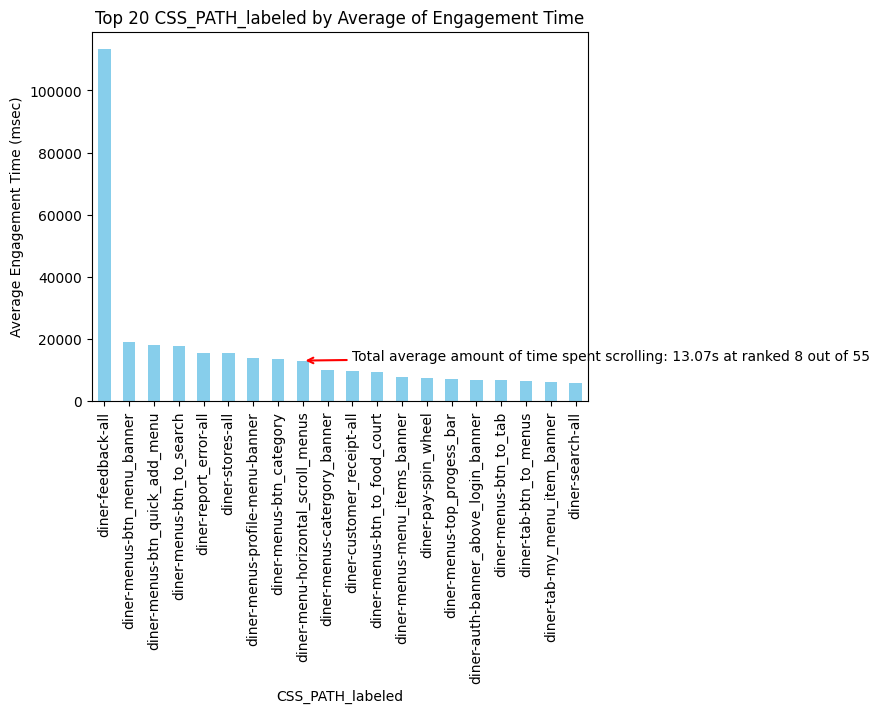

In [16]:
# Assuming css_groups_time is your Pandas Series
css_groups_time_sorted = css_groups_time_average.nlargest(20)

# Plot the top 20 groups
ax = css_groups_time_sorted.plot(kind='bar', rot=90, color='skyblue')
plt.title("Top 20 CSS_PATH_labeled by Average of Engagement Time")
plt.xlabel("CSS_PATH_labeled")
plt.ylabel("Average Engagement Time (msec)")

# Get the coordinates for a specific label (replace with your desired label)
label_to_annotate = "diner-menu-horizontal_scroll_menus"
x_coord = css_groups_time_sorted.index.get_loc(label_to_annotate)
y_coord = css_groups_time_sorted.loc[label_to_annotate]

# Annotate the point with additional information
plt.annotate(f'Total average amount of time spent scrolling: {y_coord/1000:.2f}s at ranked {x_coord} out of {numofuniqueelems}',
             xy=(x_coord, y_coord), xycoords='data',
             xytext=(10, y_coord),
             arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             )

plt.show()

In [13]:
css_groups_time_average_failed = df[failed].groupby("CSS_PATH_labeled")["engagement_time_msec"].mean()

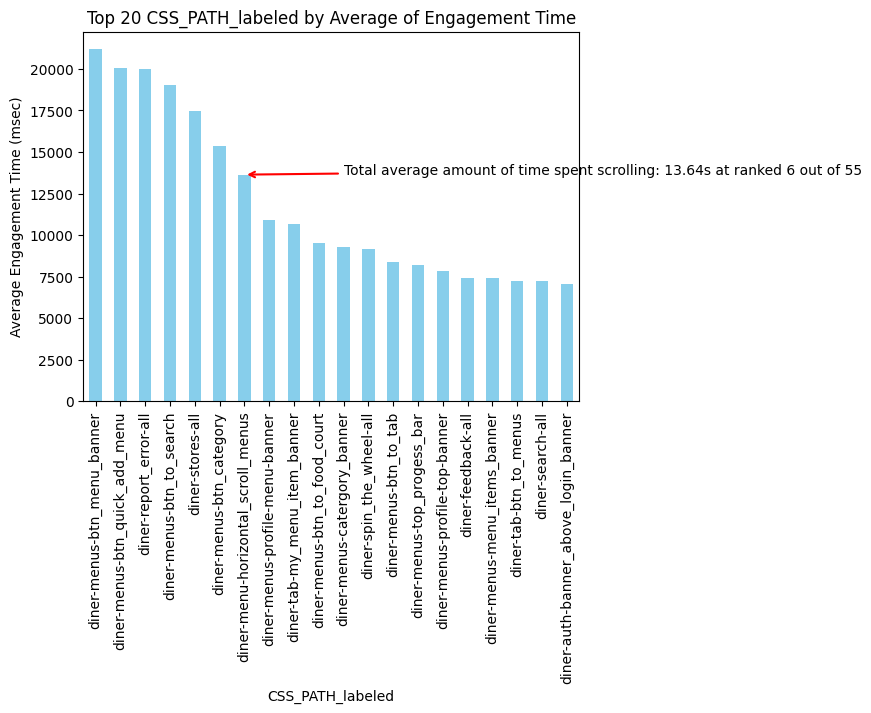

In [17]:
# Assuming css_groups_time is your Pandas Series
css_groups_time_sorted = css_groups_time_average_failed.nlargest(20)

# Plot the top 20 groups
ax = css_groups_time_sorted.plot(kind='bar', rot=90, color='skyblue')
plt.title("Top 20 CSS_PATH_labeled by Average of Engagement Time")
plt.xlabel("CSS_PATH_labeled")
plt.ylabel("Average Engagement Time (msec)")

# Get the coordinates for a specific label (replace with your desired label)
label_to_annotate = "diner-menu-horizontal_scroll_menus"
x_coord = css_groups_time_sorted.index.get_loc(label_to_annotate)
y_coord = css_groups_time_sorted.loc[label_to_annotate]

# Annotate the point with additional information
plt.annotate(f'Total average amount of time spent scrolling: {y_coord/1000:.2f}s at ranked {x_coord} out of {numofuniqueelems}',
             xy=(x_coord, y_coord), xycoords='data',
             xytext=(10, y_coord),
             arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             )

plt.show()

From the bar plots, we can see that the average engagement time spent on scrolling is significant and could be one of the factor to potential customers dropping out of the ordering system with scrolling time taking the 8th spot in both sessions and 6th spot in session which failed. This could indicate a significant event and supports our hypothesis that the scrolling feature of the SICPAMA's ordering menu might be affecting the customer churn rates.